In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import \
    classification_report, \
    confusion_matrix, \
    roc_auc_score, \
    average_precision_score, \
    precision_recall_curve, \
    roc_curve,\
    auc
    

In [15]:
data_dir = '../input/chest-xray-pneumonia/chest_xray'

test_dir = os.path.join(data_dir, 'test/')
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'val/')

model_file = os.path.join('../input/model-7', 'model.h5')

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255.)

In [17]:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42,
    classes=['NORMAL', 'PNEUMONIA']
)

train_generator = test_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42,
    classes=['NORMAL', 'PNEUMONIA']
)

valid_generator = test_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="categorical",
    shuffle=False,
    seed=42,
    classes=['NORMAL', 'PNEUMONIA']
)

Found 624 images belonging to 2 classes.
Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [18]:
model = tf.keras.models.load_model(
    model_file,
    custom_objects={
        'KerasLayer': hub.KerasLayer
    }
)

In [19]:
loss, accuracy = model.evaluate(valid_generator)

print('\nLoss: {:,.3f}'.format(loss))
print('Accuracy: {:.3%}'.format(accuracy))

1/1 [==============================] - 0s 2ms/step - loss: 4.6227 - accuracy: 0.5000

Loss: 4.623
Accuracy: 50.000%


In [20]:
loss, accuracy = model.evaluate(train_generator)

print('\nLoss: {:,.3f}'.format(loss))
print('Accuracy: {:.3%}'.format(accuracy))

163/163 [==============================] - 399s 2s/step - loss: 7.7113 - accuracy: 0.2640

Loss: 7.711
Accuracy: 26.400%


In [21]:
loss, accuracy = model.evaluate(test_generator)

print('\nLoss: {:,.3f}'.format(loss))
print('Accuracy: {:.3%}'.format(accuracy))

20/20 [==============================] - 45s 2s/step - loss: 6.7446 - accuracy: 0.3766

Loss: 6.745
Accuracy: 37.660%


---
---
---

In [22]:
batch_size = 32
num_of_train_samples = 5216

In [28]:
Y_pred = model.predict_generator(train_generator, num_of_train_samples//batch_size+1, verbose=1)
y_pred = np.argmax(Y_pred, axis=1)

163/164 [============================>.] - 404s 2s/step


In [29]:
print('Classification Report')
target_names = ['Normal', 'Pneumonia']
print(classification_report(train_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      Normal       0.26      1.00      0.41      1341
   Pneumonia       0.95      0.01      0.02      3875

    accuracy                           0.26      5216
   macro avg       0.60      0.50      0.22      5216
weighted avg       0.77      0.26      0.12      5216



In [30]:
# function to plot the roc_curve. You can utilize roc_curve and auc imported above
def plot_roc_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    fpr, tpr, thresholds = roc_curve(t_y, p_y)
    
    c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % ('Pneumonia', auc(fpr, tpr)))
    c_ax.legend()
    c_ax.set_xlabel('False Positive Rate')
    c_ax.set_ylabel('True Positive Rate')

In [31]:
# function to plot the precision_recall_curve. You can utilizat precision_recall_curve imported above
def plot_precision_recall_curve(t_y, p_y):
    fig, c_ax = plt.subplots(1,1, figsize = (9, 9))
    precision, recall, thresholds = precision_recall_curve(t_y, p_y)
    c_ax.plot(recall, precision, label = '%s (AP Score:%0.2f)'  % ('Pneumonia', average_precision_score(t_y,p_y)))
    c_ax.legend()
    c_ax.set_xlabel('Recall')
    c_ax.set_ylabel('Precision')

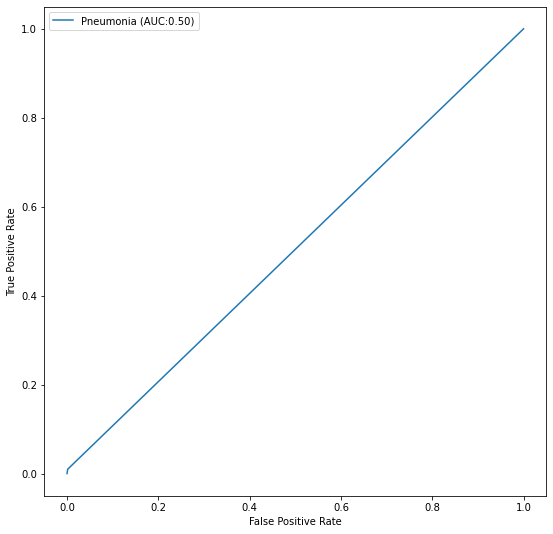

In [32]:
plot_roc_curve(train_generator.classes, y_pred)

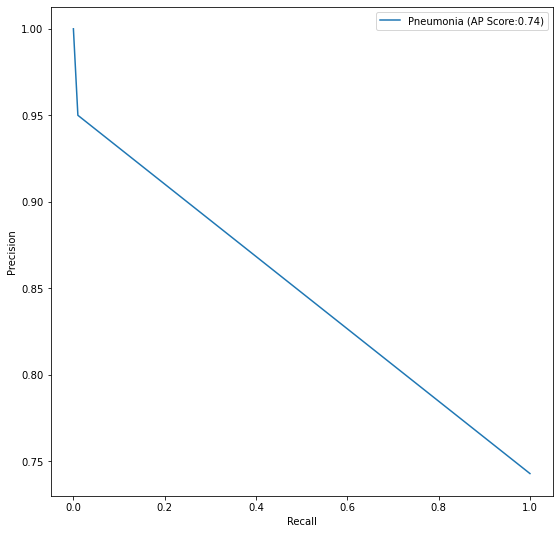

In [33]:
plot_precision_recall_curve(train_generator.classes, y_pred)